In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

def foldedSeries(df,binwidth):
    index=int(df.shape[0]/2)
    if (df.shape[0]%2!=0):
        s=list(df.iloc[index][:index+1])
    else:
        s=list(df.iloc[index][:index])
    s.reverse()
    s=0.5*(df.iloc[index][index:]+s)
    s.index = binwidth*(s.index-min(s.index))
    return s

def makeLocalOrderPlots(fname,binwidth,saveFolder):
    dfpdf=pd.read_csv(fname+".local_pdf",sep=" ",header=None)
    dfpdf=dfpdf.dropna(axis=1)
    dfnematic=pd.read_csv(fname+".local_nematic",sep=" ",header=None)
    dfnematic=dfnematic.dropna(axis=1)
    dfpolar=pd.read_csv(fname+".local_polar",sep=" ",header=None)
    dfpolar=dfpolar.dropna(axis=1)

    pdfplot=foldedSeries(dfpdf,binwidth)
    nemplot=foldedSeries(dfnematic,binwidth)
    polplot=foldedSeries(dfpolar,binwidth)

    for df in [dfpdf,dfnematic,dfpolar]:
        df.index=0.5*(df.index)
        df.columns=0.5*(df.columns-1)

    fig,ax = plt.subplots(2,3,figsize=(22,7))
    sns.heatmap(dfpdf,cmap=cm.binary,ax=ax[0][0])
    sns.heatmap(dfnematic,cmap=cm.binary,ax=ax[0][1])
    sns.heatmap(dfpolar,cmap=cm.binary,ax=ax[0][2])
    pdfplot.plot(ax=ax[1][0])
    nemplot.plot(ax=ax[1][1])
    polplot.plot(ax=ax[1][2])
    ax[0][0].set_title('PDF, $g(r)$')
    ax[0][1].set_title('Nematic order, $g_1(r)$')
    ax[0][2].set_title('Polar order, $g_2(r)$')
    for a in ax[0]:
        a.set_xlabel('x')
        a.set_ylabel('y')
    for a in ax[1]:
        a.set_xlabel('x')
    ax[1][0].set_ylabel('$g(r_\perp,r_\parallel=0)$')
    ax[1][1].set_ylabel('$g_1(r_\perp,r_\parallel=0)$')
    ax[1][2].set_ylabel('$g_2(r_\perp,r_\parallel=0)$')
    fig.tight_layout()
    if (saveFolder[-1] != "/"):
        saveFolder = saveFolder + "/"
    saveName = saveFolder+fname+".png"
    fig.savefig(saveName)

In [238]:
binwidth=0.5
saveFolder="/Users/jeff/simcore_results/structure/local/"
names=['fjj','fjf']
for fname in names:
    makeLocalOrderPlots(fname,binwidth,saveFolder)

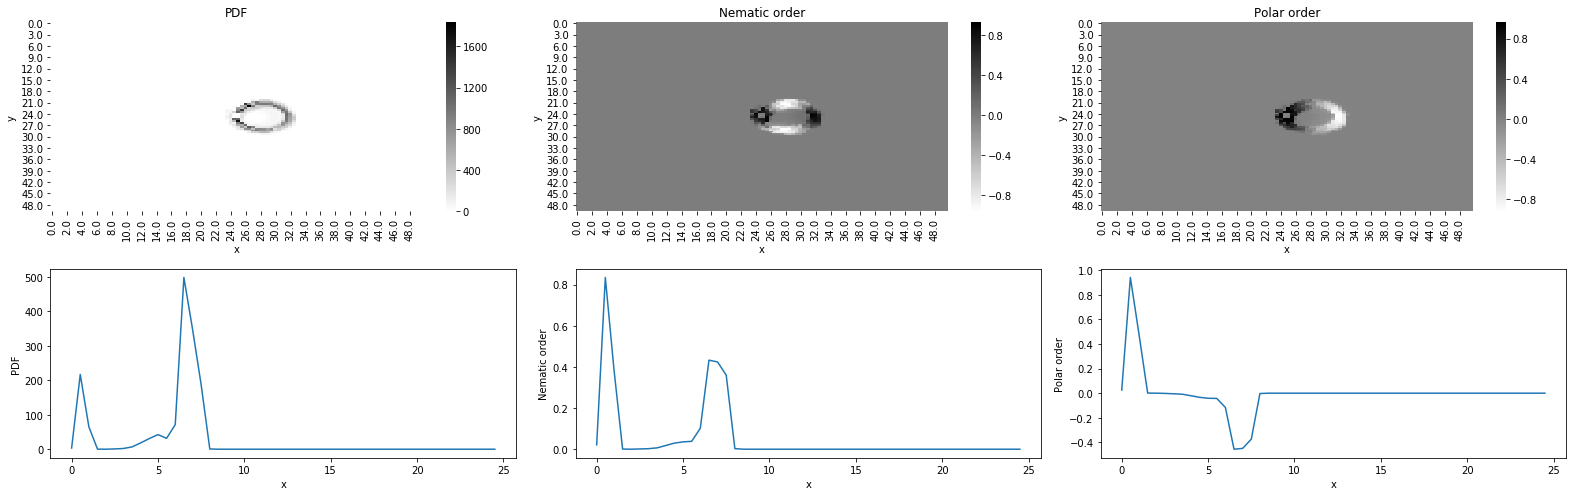

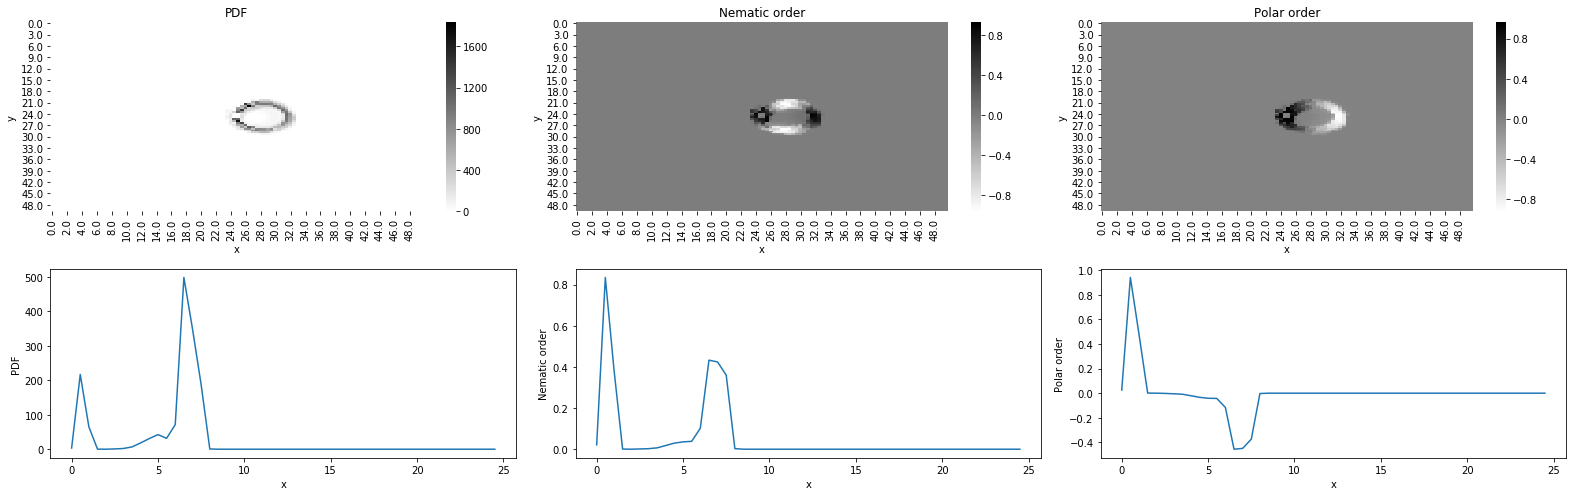

In [208]:
fname="fjj"
binwidth=0.5
dfpdf=pd.read_csv(fname+".local_pdf",sep=" ",header=None)
dfpdf=dfpdf.dropna(axis=1)
dfnematic=pd.read_csv(fname+".local_nematic",sep=" ",header=None)
dfnematic=dfnematic.dropna(axis=1)
dfpolar=pd.read_csv(fname+".local_polar",sep=" ",header=None)
dfpolar=dfpolar.dropna(axis=1)

pdfplot=foldedSeries(dfpdf,binwidth)
nemplot=foldedSeries(dfnematic,binwidth)
polplot=foldedSeries(dfpolar,binwidth)

dfpdf.index=0.5*(dfpdf.index)
dfpdf.columns=0.5*(dfpdf.columns-1)

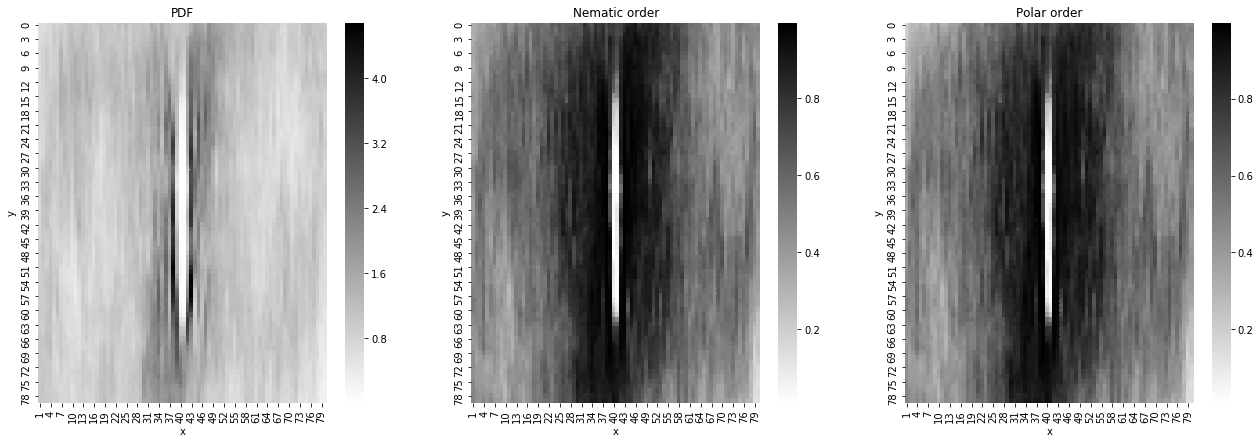

In [190]:
fig,ax = plt.subplots(1,3,figsize=(22,7))
sns.heatmap(dfpdf,cmap=cm.binary,ax=ax[0])
sns.heatmap(dfnematic,cmap=cm.binary,ax=ax[1])
sns.heatmap(dfpolar,cmap=cm.binary,ax=ax[2])
ax[0].set_title('PDF')
ax[1].set_title('Nematic order')
ax[2].set_title('Polar order')
for a in ax:
    a.set_xlabel('x')
    a.set_ylabel('y')
plt.show()

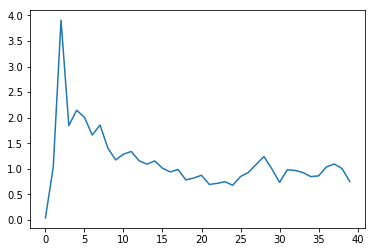

In [199]:
s.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39],
           dtype='int64')

In [191]:
dfpdf.shape
#dfpdf.iloc[index][index+1:].shape

(80, 80)

In [185]:
dfpdf.iloc[index][:index].shape

(40,)

In [157]:
dfpdf.index=0.5*(dfpdf.index)
dfpdf.columns=0.5*(dfpdf.columns-1)

In [188]:
dfpdf

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,NaN,0.606742,0.611735,0.720766,0.709114,0.904702,0.765710,0.859759,0.893883,1.098630,...,0.908032,0.945485,0.808989,1.143570,1.242610,1.231790,1.071990,1.032880,1.022060,0.954640
1,NaN,0.631710,0.621723,0.712443,0.707449,0.908864,0.841448,0.983770,0.912193,1.103620,...,0.941323,0.951311,0.803995,1.116100,1.206820,1.204330,1.061170,1.052020,1.037040,1.015400
2,NaN,0.626717,0.671660,0.791511,0.700791,0.943820,0.901373,1.041200,0.883063,1.101960,...,1.002080,0.942156,0.813982,1.119430,1.194340,1.215150,1.057840,1.044530,1.086140,0.989596
3,NaN,0.612568,0.689971,0.801498,0.673325,0.994590,0.874740,1.111110,0.883063,1.085310,...,1.008740,0.919684,0.878069,1.000420,1.275910,1.083650,1.181860,1.025380,1.089470,0.967124
4,NaN,0.643363,0.750728,0.849771,0.728256,0.946317,0.850603,1.178530,0.918019,1.123600,...,0.948814,0.985435,0.821473,1.017060,1.237620,1.037040,1.126090,1.048690,1.005410,0.970454
5,NaN,0.690803,0.775697,0.927174,0.764877,0.890554,0.898044,1.290890,0.942988,1.162710,...,0.982938,1.002910,0.864752,0.964628,1.138580,0.978777,1.119430,1.062010,0.938827,0.945485
6,NaN,0.697462,0.818976,0.944653,0.774865,0.888057,0.884727,1.392430,0.953808,1.196840,...,0.967124,0.991261,0.827299,1.015400,1.060340,0.955472,1.166040,1.052850,0.828964,0.966292
7,NaN,0.665002,0.827299,0.987932,0.759051,0.858094,0.898044,1.392430,1.022890,1.118600,...,0.886392,0.980441,0.888889,0.947982,1.117770,0.870578,1.156050,1.037870,0.854765,0.952143
8,NaN,0.630046,0.840616,0.933000,0.797337,0.861423,0.917187,1.392430,1.074490,1.182690,...,0.896380,0.908032,0.865585,0.947982,1.167710,0.849771,1.182690,1.100290,0.831461,0.938827
9,NaN,0.600083,0.794007,0.966292,0.785685,0.872243,0.958802,1.415730,1.132750,1.105290,...,0.892218,0.813150,0.864752,0.946317,1.237620,0.916355,1.154390,1.169370,0.898876,0.912193


In [153]:
dfpdf.columns=0.5*dfpdf.columns

In [154]:
dfpdf

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,35.5,36.0,36.5,37.0,37.5,38.0,38.5,39.0,39.5,40.0
0.5,0.606742,0.611735,0.720766,0.709114,0.904702,0.765710,0.859759,0.893883,1.098630,1.123600,...,0.908032,0.945485,0.808989,1.143570,1.242610,1.231790,1.071990,1.032880,1.022060,0.954640
1.0,0.631710,0.621723,0.712443,0.707449,0.908864,0.841448,0.983770,0.912193,1.103620,1.150230,...,0.941323,0.951311,0.803995,1.116100,1.206820,1.204330,1.061170,1.052020,1.037040,1.015400
1.5,0.626717,0.671660,0.791511,0.700791,0.943820,0.901373,1.041200,0.883063,1.101960,1.197670,...,1.002080,0.942156,0.813982,1.119430,1.194340,1.215150,1.057840,1.044530,1.086140,0.989596
2.0,0.612568,0.689971,0.801498,0.673325,0.994590,0.874740,1.111110,0.883063,1.085310,1.291720,...,1.008740,0.919684,0.878069,1.000420,1.275910,1.083650,1.181860,1.025380,1.089470,0.967124
2.5,0.643363,0.750728,0.849771,0.728256,0.946317,0.850603,1.178530,0.918019,1.123600,1.313360,...,0.948814,0.985435,0.821473,1.017060,1.237620,1.037040,1.126090,1.048690,1.005410,0.970454
3.0,0.690803,0.775697,0.927174,0.764877,0.890554,0.898044,1.290890,0.942988,1.162710,1.285060,...,0.982938,1.002910,0.864752,0.964628,1.138580,0.978777,1.119430,1.062010,0.938827,0.945485
3.5,0.697462,0.818976,0.944653,0.774865,0.888057,0.884727,1.392430,0.953808,1.196840,1.242610,...,0.967124,0.991261,0.827299,1.015400,1.060340,0.955472,1.166040,1.052850,0.828964,0.966292
4.0,0.665002,0.827299,0.987932,0.759051,0.858094,0.898044,1.392430,1.022890,1.118600,1.290050,...,0.886392,0.980441,0.888889,0.947982,1.117770,0.870578,1.156050,1.037870,0.854765,0.952143
4.5,0.630046,0.840616,0.933000,0.797337,0.861423,0.917187,1.392430,1.074490,1.182690,1.282560,...,0.896380,0.908032,0.865585,0.947982,1.167710,0.849771,1.182690,1.100290,0.831461,0.938827
5.0,0.600083,0.794007,0.966292,0.785685,0.872243,0.958802,1.415730,1.132750,1.105290,1.364130,...,0.892218,0.813150,0.864752,0.946317,1.237620,0.916355,1.154390,1.169370,0.898876,0.912193
